#IMPORTATIONS

In [1]:
import numpy as np
import pandas as pd
import random
import time
from datetime import datetime, timedelta
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

#DATA EXPLORATION

In [33]:
# Read the dataset
data = pd.read_csv('flights_record.csv')

In [3]:
print(f'The dataset shape is: {data.shape}')
data.head()

The dataset shape is: (3647, 24)


,DATE,TIME,FLIGHT,FROM,TO,AIRLINE,AIRCRAFT,STATUS,TEMPERRATURE_departures,WIND_departures,...,scheduled_departures,actual_departures,scheduled_arrival,actual_arrival,delay_departure,direction_departure,delay_arrival,direction_arrival,scheduled_departure_hour,scheduled_arrival_hour
0,"Tuesday, May 16",12:20,U21265,Basel (BSL),Tel_Aviv,easyJet,A320 (HB-JXO),Landed 12:26,11,8,...,7:15,7:20,12:20,12:26,5,1,6,1,7,12
1,"Tuesday, May 16",12:20,7L218,Baku (GYD),Tel_Aviv,Silk Way West Airlines,B744 (4K-SW888),Landed 20:29,14,6,...,10:00,18:37,12:20,20:29,517,1,489,1,10,12
2,"Tuesday, May 16",12:35,TK862,Istanbul (IST),Tel_Aviv,Turkish Airlines,A320 (TC-JPH),Landed 13:04,14,10,...,10:30,11:03,12:35,13:04,33,1,29,1,10,12
3,"Tuesday, May 16",12:40,GF972,Bahrain (BAH),Tel_Aviv,Gulf Air,A21N (A9C-NC),Landed 12:24,31,4,...,9:50,9:50,12:40,12:24,0,0,-16,-1,9,12
4,"Tuesday, May 16",12:50,A3526,Rhodes (RHO),Tel_Aviv,Aegean Airlines,A320 (SX-DVX),Landed 12:43,19,10,...,11:20,11:28,12:50,12:43,8,1,-7,-1,11,12


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 0 to 3646
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   DATE                      3647 non-null   object
 1   TIME                      3647 non-null   object
 2   FLIGHT                    3647 non-null   object
 3   FROM                      3647 non-null   object
 4   TO                        3647 non-null   object
 5   AIRLINE                   3647 non-null   object
 6   AIRCRAFT                  3647 non-null   object
 7   STATUS                    3647 non-null   object
 8   TEMPERRATURE_departures   3647 non-null   int64 
 9   WIND_departures           3647 non-null   int64 
 10  DIRECTION_departures      3647 non-null   int64 
 11  TEMPERRATURE_arrival      3647 non-null   int64 
 12  WIND_arrival              3647 non-null   int64 
 13  DIRECTION_arrival         3647 non-null   object
 14  scheduled_departures    

##target variables visualization

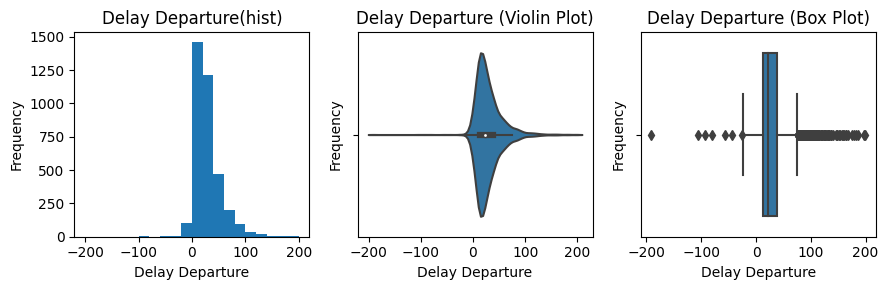

In [7]:
# Filter the "delay_departure" values within the desired range
filtered_data = data[(data['delay_departure'] >= -200) & (data['delay_departure'] <= 200)]

# Create subplots with a single row and three columns
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# Plot histogram
axs[0].hist(filtered_data['delay_departure'], bins=20, range=(-200, 200))
axs[0].set_xlabel('Delay Departure')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Delay Departure(hist)')

# Plot violin plot
sns.violinplot(x=filtered_data['delay_departure'], ax=axs[1])
axs[1].set_xlabel('Delay Departure')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Delay Departure (Violin Plot)')

# Plot box plot
sns.boxplot(x=filtered_data['delay_departure'], ax=axs[2], whis=1.5)
axs[2].set_xlabel('Delay Departure')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Delay Departure (Box Plot)')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

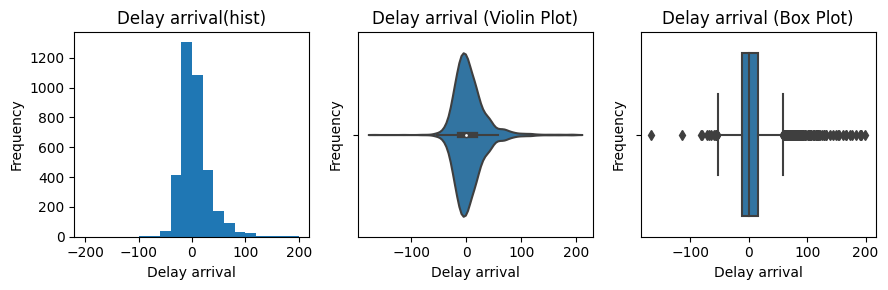

In [31]:
# Filter the "delay_departure" values within the desired range
filtered_data = data[(data['delay_arrival'] >= -200) & (data['delay_arrival'] <= 200)]

# Create subplots with a single row and three columns
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# Plot histogram
axs[0].hist(filtered_data['delay_arrival'], bins=20, range=(-200, 200))
axs[0].set_xlabel('Delay arrival')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Delay arrival(hist)')

# Plot violin plot
sns.violinplot(x=filtered_data['delay_arrival'], ax=axs[1])
axs[1].set_xlabel('Delay arrival')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Delay arrival (Violin Plot)')

# Plot box plot
sns.boxplot(x=filtered_data['delay_arrival'], ax=axs[2], whis=1.5)
axs[2].set_xlabel('Delay arrival')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Delay arrival (Box Plot)')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

##correlation

<ipython-input-34-728798d9328b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


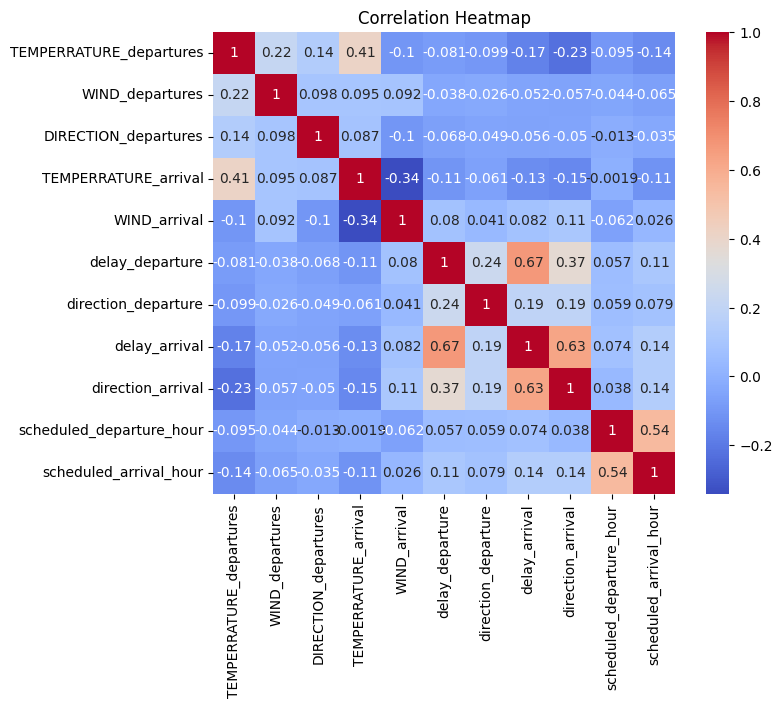

In [34]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

#MODELING

In this part, we test 3 ML techniques to predict our 2 target variables: 'delay_departure' and 'delay_arrival'.

## 1.linear regression

###'delay_departure'

In [35]:
# Prepare data
data = pd.read_csv('flights_record.csv')
# Prepare X and y
y = data['delay_departure']
data = data.drop(['delay_departure'], axis=1)
X = data.select_dtypes(include=['int', 'float']).values

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the machine learning model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
accuracy1 = model.score(X_test, y_test)
print("Model Accuracy:", accuracy1)

Model Accuracy: 0.71831516047533


###'delay_arrival'

In [36]:
# Prepare data
data = pd.read_csv('flights_record.csv')

# Prepare X and y
y = data['delay_arrival']
data = data.drop(['delay_arrival'], axis=1)
X = data.select_dtypes(include=['int', 'float']).values

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the machine learning model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
accuracy2 = model.score(X_test, y_test)
print("Model Accuracy:", accuracy2)

Model Accuracy: 0.5865877504910719


##2.random forest regressor

###'delay_departure'

In [37]:
# Prepare data
data = pd.read_csv('flights_record.csv')

# Prepare X and y
y = data['delay_departure']
data = data.drop(['delay_departure'], axis=1)
X = data.select_dtypes(include=['int', 'float']).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the machine learning model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy3 = model.score(X_test, y_test)
print("Model Accuracy:", accuracy3)

Model Accuracy: 0.7765340094843546


###'delay_arrival'

In [38]:
# Prepare data
data = pd.read_csv('flights_record.csv')

# Prepare X and y
y = data['delay_arrival']
data = data.drop(['delay_arrival'], axis=1)
X = data.select_dtypes(include=['int', 'float']).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the machine learning model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy4 = model.score(X_test, y_test)
print("Model Accuracy:", accuracy4)

Model Accuracy: 0.8436364230025993


## 3.gradient boosting regressor

###'delay_departure'

In [39]:
# Prepare data
data = pd.read_csv('flights_record.csv')

# Prepare X and y
y = data['delay_departure']
data = data.drop(['delay_departure', 'actual_departures'], axis=1)
X = data.select_dtypes(include=['int', 'float']).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the machine learning model (Gradient Boosting Regressor)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy5 = model.score(X_test, y_test)
print("Model Accuracy:", accuracy5)

Model Accuracy: 0.8433379292827841


###'delay_arrival'

In [40]:
# Prepare data
data = pd.read_csv('flights_record.csv')

# Prepare X and y
y = data['delay_arrival']
data = data.drop(['delay_arrival', 'actual_arrival'], axis=1)
X = data.select_dtypes(include=['int', 'float']).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the machine learning model (Gradient Boosting Regressor)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy6 = model.score(X_test, y_test)
print("Model Accuracy:", accuracy6)

Model Accuracy: 0.8659596309495732


##4.GBR + feature importance

###'delay_departure'

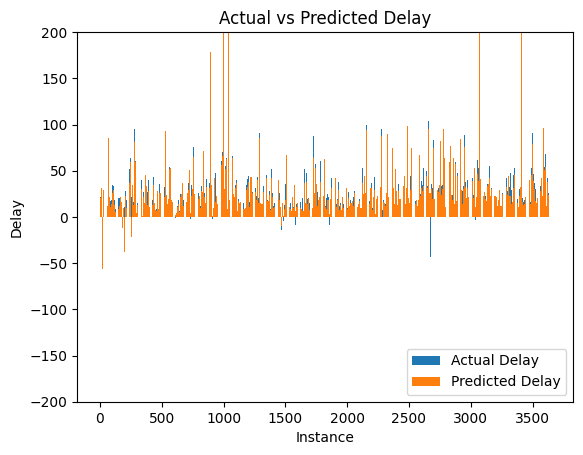

Accuracy: 93.551856%
Feature importances:
                   Feature  Importance
5            delay_arrival    0.613637
7   scheduled_arrival_hour    0.100462
4             WIND_arrival    0.085243
2     DIRECTION_departures    0.084675
3     TEMPERRATURE_arrival    0.049209
1          WIND_departures    0.037412
0  TEMPERRATURE_departures    0.019946
6        direction_arrival    0.009415


In [41]:
# Prepare data
data = pd.read_csv('flights_record.csv')

# Prepare X and y
y = data['delay_departure']
data = data.drop(['delay_departure', 'actual_departures','scheduled_departures','direction_departure','scheduled_departure_hour'], axis=1)
X = data.select_dtypes(include=['int', 'float']).values
col_names = data.select_dtypes(include=['int', 'float']).columns

# Train the machine learning model (Gradient Boosting Regressor)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual Delay': y, 'Predicted Delay': y_pred})

# Create an array for x-axis values (indices)
x = np.arange(len(results_df))

# Plot the bar plot
plt.bar(x, results_df['Actual Delay'], label='Actual Delay')
plt.bar(x, results_df['Predicted Delay'], label='Predicted Delay')
plt.xlabel('Instance')
plt.ylabel('Delay')
plt.title('Actual vs Predicted Delay')
plt.ylim(-200, 200)  # Set the Y-axis limits
plt.legend()
plt.show()

# Print the accuracy percentage
accuracy7 = model.score(X, y) * 100
print("Accuracy: {:.6f}%".format(accuracy7))

# Get the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with the column names and feature importances
importance_df = pd.DataFrame({'Feature': col_names, 'Importance': feature_importances})

# Sort the DataFrame by feature importances in descending order
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print the feature importances
print("Feature importances:")
print(importance_df)

###'delay_arrival'

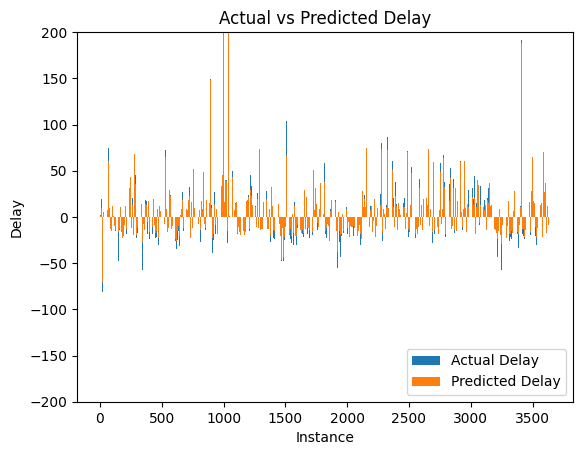

Accuracy: 94.647679%
Feature importances:
                    Feature  Importance
4           delay_departure    0.710514
6         direction_arrival    0.201699
2      DIRECTION_departures    0.037456
7  scheduled_departure_hour    0.016308
3              WIND_arrival    0.016012
0   TEMPERRATURE_departures    0.010078
1           WIND_departures    0.007717
5       direction_departure    0.000216


In [42]:
# Prepare data
data = pd.read_csv('flights_record.csv')

# Prepare X and y
y = data['delay_arrival']
data = data.drop(['delay_arrival', 'actual_arrival','scheduled_arrival','scheduled_arrival_hour', 'TEMPERRATURE_arrival'], axis=1)
X = data.select_dtypes(include=['int', 'float']).values
col_names = data.select_dtypes(include=['int', 'float']).columns

# Train the machine learning model (Gradient Boosting Regressor)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual Delay': y, 'Predicted Delay': y_pred})

# Create an array for x-axis values (indices)
x = np.arange(len(results_df))

# Plot the bar plot
plt.bar(x, results_df['Actual Delay'], label='Actual Delay')
plt.bar(x, results_df['Predicted Delay'], label='Predicted Delay')
plt.xlabel('Instance')
plt.ylabel('Delay')
plt.title('Actual vs Predicted Delay')
plt.ylim(-200, 200)  # Set the Y-axis limits
plt.legend()
plt.show()

# Print the accuracy percentage
accuracy8 = model.score(X, y) * 100
print("Accuracy: {:.6f}%".format(accuracy8))

# Get the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with the column names and feature importances
importance_df = pd.DataFrame({'Feature': col_names, 'Importance': feature_importances})

# Sort the DataFrame by feature importances in descending order
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print the feature importances
print("Feature importances:")
print(importance_df)

#RESULTS

In [48]:
dep_accuracy_values = [accuracy1, accuracy3, accuracy5, accuracy7]
arr_accuracy_values = [accuracy2, accuracy4, accuracy6, accuracy8]

# Create a dictionary with your data
models = {
    'Model': ['LinearRegression', 'RandomForestRegressor', 'GradientBoostingRegressor', 'GBR + Feature Importance'],
    'delay_departure': dep_accuracy_values,
    'delay_arrival': arr_accuracy_values
}

# Create a DataFrame
results = pd.DataFrame(models)

# Display the DataFrame
results.head()

,Model,delay_departure,delay_arrival
0,LinearRegression,0.718315,0.586588
1,RandomForestRegressor,0.776534,0.843636
2,GradientBoostingRegressor,0.843338,0.865960
3,GBR + Feature Importance,93.551856,94.647679


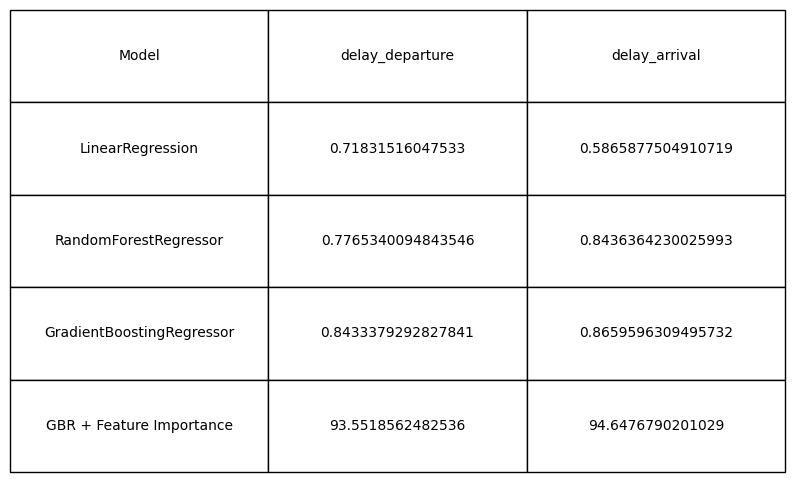

In [52]:
# Plot the DataFrame and save the plot as an image
plt.figure(figsize=(10, 6))
plt.axis('off')  # Turn off axis labels
plt.table(cellText=results.head().values,
          colLabels=results.columns,
          cellLoc='center',
          loc='center',
          bbox=[0, 0, 1, 1])
plt.savefig('results.png')  # Save the plot as an image
plt.show()